## 확률적 경사 하강법

In [1]:
# 점진적 학습의 대표적 알고리즘은 확률적 경사 하강법(Stochasitc Gradient Descent)입니다.
# 확률적 경사 하강법은 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾습니다.
# 이처럼 훈련 세트에서 랜덤하게 하나의 샘플을 고르는 것이 바로 확률적 경사 하강법입니다.

# 확률적 경사 하강법은 훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려갑니다.
# 그다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려갑니다. 이런 식으로 전체 샘플을 모두 사용할 때 까지 계속합니다.

# 모든 샘플을 사용했지만 다 못내려오면 어떡하나요? 다시 처음부터 시작합니다.
# 훈련 세트에 모든 샘플을 다시 채워 넣습니다. 그다음 다시 반복하여 만족할만한 위치에 도달할 때까지 계속 내려갑니다.

# 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정을 에포크(epoch)라고 부릅니다. 
# 일반적으로 경사 하강법은 수십, 수백 번 이상의 에포크를 수행합니다.

# 무작위로 샘플을 선택해 내려가기 때문에 아주 조금씩 내려가야 합니다. 걱정과 달리 확률적 하강 경사법은 꽤 잘 동작합니다.
# 만약 그래도 걱정이 된다면 1개씩 말고 무작위로 몇 개의 샘플을 선택하여 경사를 내려가면 어떨까요?

# 가능합니다. 이렇게 여러 개의 샘플을 사용해 경사 하강법을 수행하는 방식은 미니배치 경사 하강법(minibatch gradent descent)라고 합니다.
# 사실 전체 데이터를 이용하기 때문에 가장 안정적인 방법이 될 수 있습니다.

# 하지만 전체 데이터를 사용하면 그 만큼 컴퓨터 자원을 많이 사용하게 됩니다.
# 어떤 경우는 데이터가 너무 많아 한 번에 전체 데이터를 모두 읽을 수 없을지도 모릅니다.

In [2]:
# 확률적 경사 하강법은 훈련 세트를 사용해 산 아래에 잇는 최적의 장소로 조금씩 이동하는 알고리즘이군요
# 이 때문에 훈련 데이터가 모두 준비되어 있지 않고 매일매일 업데이트되어도 학습을 계속 이어갈수 있습니다. 즉 다시 산꼭대기부터 시작할 필요가 없다는 뜻이죠
# 그런데 어디서 내려가야 할까요? 가장 빠른 길을 찾아 내려가려고 하는 이산은 무엇일까요? 이 산은 바로 손실함수(loss function)이라고 부릅니다.

In [3]:
# 손실함수(loss function)은 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준입니다.
# 그렇다면 손실 함수의 값이 작을수록 좋겠네요. 하지만 어떤 값이 최솟값인지 알진 못합니다.

# 다행히 우리가 다루는 많은 문제에 필요한 손실 함수는 이미 정의되어 있습니다.
# 그럼 생선을 분류하기 위해서는 어떤 손실 함수를 사용할까요

In [4]:
# 분류에서 손실은 아주 확실합니다. 정답을 못 맞히는 거죠.
# 정확도를 손실 함수로 사용할수 있지 않을까요? 정확도에 음수를 취하면 -1.0이 가장 낮고 -0.0이 가장 높습니다 어떨까요?

# 하지만 정확도에는 치명적 단점이 있습니다. 4개의 샘플만 있다면 정확도는 오직 0, 0.25, 0.5, 0.75, 1 다섯가지 뿐입니다.
# 정확도가 이렇게 듬성듬성하다면 경사 하강법을 이용해 조금식 움직일수 없스빈다. 좀더 확실히 연속적이어야 합니다.

In [5]:
# 그럼 어떻게 연속적인 손실 함수를 만들수 있을까요? 1절 '로지스틱 회귀'에서 로지스틱 회귀 모델이 확률을 출력한 것을 기억하시나요?
# 예측은 0또는 1이지만 확률은 0~1 사이의 어떤 값도 될 수있습니다. 즉 연속적이죠
# 예로 샘플 4개의 예측 확률을 0.9, 0.3, 0.2, 0.8로 가정해봅니다.

In [6]:
# <로지스틱 손실 함수>
# 첫 번재 샘플의 예측은 0.9이므로 타깃인 1과 곱한 다음 음수로 바꿀수 있습니다. 두번째.. 34하면 -0.9, -0.3, -0.8, -0.2가 나옵니다.
# 13은 낮은 손실이여 24는 높은 손실이 나옵니다.
# 예측 확률을 사용해 이런방식으로 계산하면 연속적인 손실 함수를 얻을 수 있을 것 같습니다.

# 여기에서 예측 확률에 로그 함수를 적용하면 더 좋습니다. 예측 확률의 범위는 0~1 사이인데 로그 함수는 이 사이에서 음수가 되므로 최종 손실값은 양수가 됩니다.
# 손실이 양수가 되면 더 이해하기 쉽고 로그 함수는 0에 가까울수록 아주 큰 음수가 되기때문에 손실을 자주 크게 만들어 모델에 큰 영향을 미칠 수 있습니다.

# 이 손실 함수를 로지스틱 손실 함수(logistic loss function)라고 부릅니다. 또는 이진 크로스엔트로피 손실 함수(binary cross-entropy loss function)라고도 부릅니다.
# 앞서 설명했듯이 손실 함수를 우리가 직접 만드는 일은 거의 없습니다.

# 이진 분류는 로지스틱 손실 함수를 사용하고 다중 분류는 크로스엔트로피 손실 함수를 사용합니다.

### SGDClassifier

In [7]:
# 확률적 경사 하강법을 사용한 분류 모델을 만들어보겠습니다.
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [8]:
# 그다음 Species 열을 제외한 나머지 5개는 입력 데이터로 사용합니다. Species 열은 타깃 데이터입니다.
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [9]:
# 훈련 세트와 테스트세트로 나누고, 특성을 전처리 하기(훈련 세트 학습 통계값으로 테스트 세트도 변환)
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [13]:
# 특성값의 스케일을 맞춘 train_scaled와 test_sclaed 두 넘파이 배열을 준비했습니다.
# SGDClassifier의 객체를 만들 때 2개의 매개변수를 지정합니다. loss는 손실 함수의 종류를 지정합니다.
# 여기에서는 loss='log'로 지정하여 로지스틱 손실 함수를 지정했습니다.
# max_iter는 수행할 에포크 횟수를 지정합니다. 10으로 지정하여 전체 훈련 세트를 10회 반복하겠습니다.
# 그다음 훈련 세트와 테스트 세트에서 정확도 점수를 출력합니다.
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [15]:
# 출력된 훈련 세트와 테스트 세트의 정확도가 낮군요, 아마도 지정한 반복 횟수 10번이 부족한 것으로 보입니다.

# 앞서 이야기한 것처럼 확률적 경사 하강법은 점진적 학습이 가능합니다.
# SGDClassifier 객체를 다시 만들지 않고 훈련한 모델 sc를 추가로 더 훈련해 봅시다.
# 모델을 이어서 훈련할 때는 partial_fit() 메서드를 이용합니다.

# 이 메서드는 fit() 메서드와 사용법이 같지만 호출할 때마다 1 에포크씩 이어서 훈련할 수 있습니다.
# partial_fit() 메서드를 호출하고 다시 훈련 세트와 테스트 세트의 점수를 확인해 봅시다.
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7815126050420168
0.8


In [ ]:
# 정확도가 향상되었지만, 이 모델을 여러 에포크에서 더 훈련할 필요가 있네요.
# 근데 얼마나 더 훈련해야 할까요? 기준이 필요하네요

### 에포크와 과대/과소적합

In [16]:
# 확률적 경사 하강법을 사용한 모델은 에포크나 횟수에 따라 과소적합이나 과대적합이 될 수 있습니다.
# 에포크 횟수가 적으면 모델이 훈련 세트를 덜 학습합니다. 마치 산을 다 내려오지 못하고 훈련을 마치는 것이죠
# 에포크 횟수가 충분히 많으면 훈련 세트를 완전히 학습할 것입니다.

# 적은 에포크 횟수 동안에 훈련한 모델은 과소적합의 가능성이 높고, 많은 에포크 횟수 동안에 훈련한 모델은 과대적합된 모델일 가능성이 높습니다.


# 훈련 세트 점수는 에포크가 진행될수록 꾸준히 증가하지만 테스트 세트 점수는 어느 순간 감소하기 시작합니다. 바로 이 지점이 모델이 과대적합되기 시작하는 곳입니다.
# 과대적합이 시작하기 전에 훈련을 멈추는 것을 조기 종료(early stopping)라고 합니다.

# 우리가 준비한 데이터셋으로 위와 같은 그래프를 만들어봅니다.
# 이 예제에서는 fit() 메서드를 사용하지 않고 partial_fit() 메서드만 사용하겠습니다.
# partial_fit() 메서드만 사용하려면 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit() 메서드에 전달해 주어야 합니다.
# 이를 위해 np.unique() 함수로 train_target에 있는 7개 생선의 목록을 만듭니다.
# 또 에포크 마다 훈련 세트와 테스트 세트에 대한 점수를 기록하기 위해 2개의 리스트를 만듭니다.

In [19]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [20]:
# 이제 300번의 에포크 동안 훈련을 반복하여 진행해 보겠습니다.
# 훈련 세트와 테스트 세트의 점수를 계산하여 train_score, test_score 리스트에 추가합니다.
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

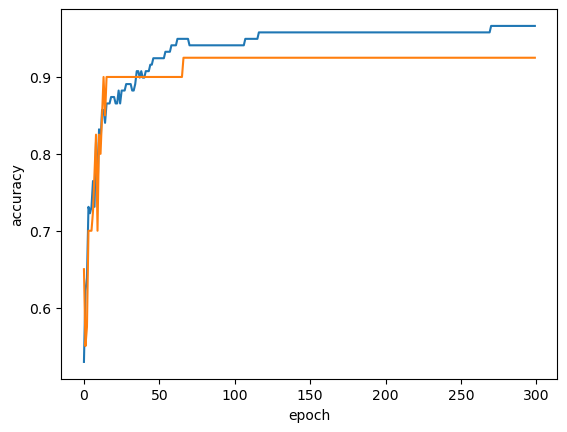

In [21]:
# 300번의 에포크 동안 기록한 훈련 세트와 테스트 세트의 점수를 그래프로 그려봅니다.
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [23]:
# 파란색: 훈련 세트 그래프, 주황색: 테스트 세트 그래프
# 잘보면 백 번재 에포크 이후 훈련 세트와 테스트 세트의 점수가 조금씩 벌어집니다. 또 확실히 에포크 초기에는 과소적합되어 훈련 세트와 테스트 세트의 점수가 낮습니다.
# 이 모델의 경우 백 번째 에포크가 적절한 반복 횟수로 보입니다.

# 그럼 SGDClassifier의 반복 횟수를 100에 맞추고 모델을 다시 훈련해 보겠습니다.
# 그리고 최종적으로 훈련 세트와 테스트 세트에서 점수를 출력합니다.
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [24]:
# SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춥니다.
# tol 매개변수에서 향상될 최솟값을 지정합니다. 앞의 코드에서 tol 매개변수를 None으로 지정하여 자동으로 멈추지 않고 max_iter=100만큼 무조건 반복하도록 하였습니다.

In [25]:
# SGDClassifier의 loss 매개변수를 잠시 알아보겠습니다.
# loss 매개변수의 기본값은 'hinge'입니다. 힌지 손실(hinge loss)은 서포트 벡터 머신(support vector machine)이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실 함수입니다.
# 더이상 자세히 다루진 않지만 서포트 벡터 머신이 널리 사용하는 머신러닝알고리즘 중 하나라는 점과 SGDClassifier가 여러 종류의 손실 함수를 loss 매개변수에 지정하여
# 다양한 머신러닝 알고리즘을 지원하는 것을 기억해주세요

# 간단한 예로 힌지 손실을 사용해 같은 반복 횟수동안 모델을 훈련해 봅니다.
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


In [ ]:
# 점진적 학습을 위한 확률적 경사 하강법
# 확률적 경사 하강법을 사용해 점진적으로 학습하는 로지스틱 회귀 모델을 훈련했습니다.
# 확률적 경사 하강법은 손실 함수라는 산을 정의하고 가장 가파른 경사를 따라 조금씩 내려오는 알고리즘입니다.
# 충분히 반복하여 훈련하면 훈련 세트에서 높은 점수를 얻는 모델을 만들 수 있습니다.

# 하지만 훈련을 반복할수록 모델이 훈련 세트에 점점 더 잘 맞게 되어 어느 순간 과대적합되고 테스트 세트의 정확도가 줄어들 것입니다.
# 요즘엔 데이터를 한 번에 모두 읽을 수 없기 때문에 데이터를 조금씩 사용해 점진적 학습이 필요합니다.

# 확률적 하강 경사법이 바로 이 문제의 핵심 열쇵이빈다.